In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)

print('%d rows and %d columns' % (data.shape[0],data.shape[1]))
data.groupby(['arrhythmia']).size()
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

data = data._get_numeric_data()
X = data.iloc[:, :-2]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
display(data.head(3))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20171012)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

452 rows and 281 columns
452 rows and 276 columns


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8,1
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10,1


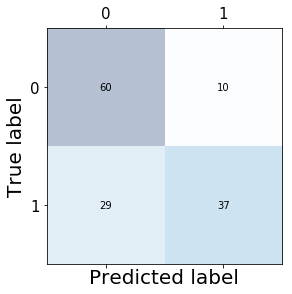

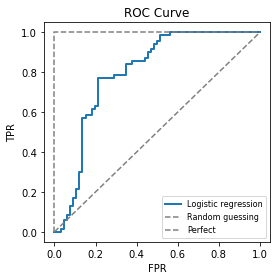

AUC: 0.80


In [2]:
c = 0.01


lr = LogisticRegression(C = c, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

probas = lr.predict_proba(X_test_std)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 0], pos_label=0)

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, lw=2, label='Logistic regression')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')

plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray', label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.legend(loc=4, prop={'size': 8})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

print('AUC: %.2f' % auc(fpr, tpr))